In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2024-06-05 17:01:07.331253: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 17:01:08.522597: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.16.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/tmp/ipykernel_9755/1853370235.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('adult/adult.data', sep=", ",header = None)
/tmp/ipykernel_9755/1853370235.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [5]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


# Zad
Nauczmy model z BatchNormalization

Pamiętaj, że 

* BatchNormalization powinno być dodane przed funkcją katywacji
* ustaw parametr use_bias=False

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100, use_bias=False,input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(10, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


/home/sit3kk/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-05 17:01:22.399374: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-05 17:01:22.777213: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-p

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,251 (40.04 KB)

 Trainable params: 9,931 (38.79 KB)

 Non-trainable params: 320 (1.25 KB)

In [8]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [9]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Epoch 1/100


I0000 00:00:1717599689.345610   10090 service.cc:145] XLA service 0x7f307c00d3b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717599689.345637   10090 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-06-05 17:01:29.401079: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-05 17:01:29.932874: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


107/943 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7792 - loss: 0.5031

I0000 00:00:1717599690.873398   10090 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


943/943 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7900 - loss: 0.4535 - val_accuracy: 0.7750 - val_loss: 0.4629
Epoch 2/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8154 - loss: 0.3778 - val_accuracy: 0.7759 - val_loss: 0.4524
Epoch 3/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8183 - loss: 0.3746 - val_accuracy: 0.7772 - val_loss: 0.4581
Epoch 4/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8223 - loss: 0.3691 - val_accuracy: 0.7774 - val_loss: 0.4619
Epoch 5/100
933/943 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8237 - loss: 0.3676

KeyboardInterrupt: 

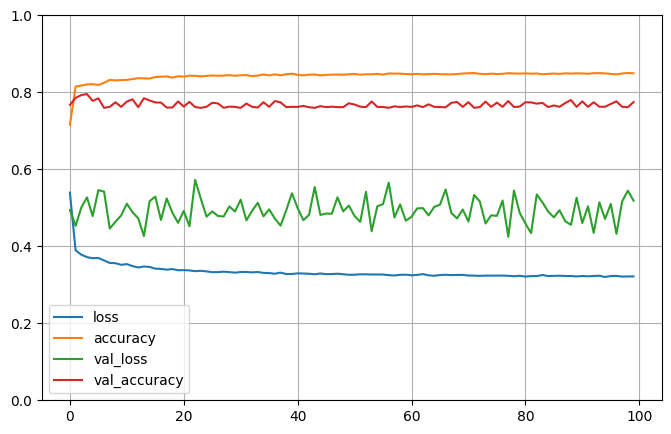

In [11]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 1ms/step - loss: 0.5186 - accuracy: 0.7745


[0.5186120867729187, 0.7745019793510437]

In [13]:
from sklearn import  metrics
metrics.accuracy_score(y_true=y_test, y_pred=np.argmax(model.predict(X_test), axis=-1) )

471/471 [==============================] - 1s 1ms/step


0.7543160690571049

# Zad.
Do poniższego modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia
* narysuj granice decyzyjne (dane są w 2D)




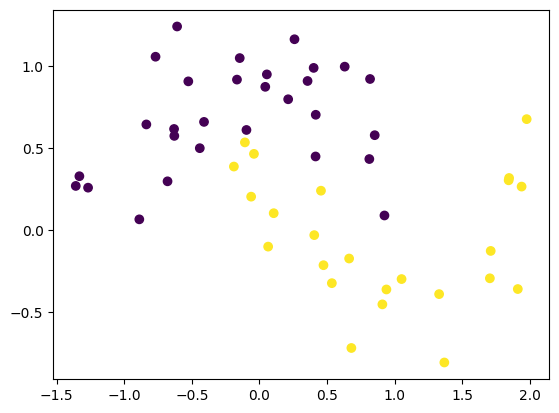

In [14]:
from sklearn.datasets import make_moons
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=5)
# split into train and test
# n_train = 30
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=2)

n_train=53
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.show()

In [16]:
from keras.callbacks import History


history_Adam = History()
model = Sequential()
model.add(Dense(1000,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dense(500,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=1000, callbacks=[history_Adam])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              3000      
                                                                 
 dense_9 (Dense)             (None, 500)               500500    
                                                                 
 dense_10 (Dense)            (None, 200)               100200    
                                                                 
 dense_11 (Dense)            (None, 1)                 201       
                                                                 
Total params: 603901 (2.30 MB)
Trainable params: 603901 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
2/2 [==============================] - 1s 180ms/step - loss: 0.6697 - accuracy: 0.5094 - val_loss: 0.5838 - val_accuracy: 0.7660
Epoch 2/30

Epoch 443/1000
53/53 [==============================] - 0s 585us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2668 - val_accuracy: 0.9149
Epoch 444/1000
53/53 [==============================] - 0s 566us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2674 - val_accuracy: 0.9149
Epoch 445/1000
53/53 [==============================] - 0s 566us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2681 - val_accuracy: 0.9149
Epoch 446/1000
53/53 [==============================] - 0s 566us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2688 - val_accuracy: 0.9149
Epoch 447/1000
53/53 [==============================] - 0s 510us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2680 - val_accuracy: 0.9149
Epoch 448/1000
53/53 [==============================] - 0s 566us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2676 - val_accuracy: 0.9149
Epoch 449/1000
53/53 [==============================] - 0s 529us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2682 -

Epoch 499/1000
53/53 [==============================] - 0s 548us/step - loss: 9.5533e-04 - accuracy: 1.0000 - val_loss: 0.2899 - val_accuracy: 0.9149
Epoch 500/1000
53/53 [==============================] - 0s 529us/step - loss: 9.4799e-04 - accuracy: 1.0000 - val_loss: 0.2903 - val_accuracy: 0.9149
Epoch 501/1000
53/53 [==============================] - 0s 548us/step - loss: 9.4707e-04 - accuracy: 1.0000 - val_loss: 0.2908 - val_accuracy: 0.9149
Epoch 502/1000
53/53 [==============================] - 0s 546us/step - loss: 9.5402e-04 - accuracy: 1.0000 - val_loss: 0.2915 - val_accuracy: 0.9149
Epoch 503/1000
53/53 [==============================] - 0s 529us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2922 - val_accuracy: 0.9149
Epoch 504/1000
53/53 [==============================] - 0s 566us/step - loss: 9.9512e-04 - accuracy: 1.0000 - val_loss: 0.2911 - val_accuracy: 0.9149
Epoch 505/1000
53/53 [==============================] - 0s 529us/step - loss: 9.5823e-04 - accuracy: 1.0

Epoch 608/1000
53/53 [==============================] - 0s 510us/step - loss: 6.0724e-04 - accuracy: 1.0000 - val_loss: 0.3219 - val_accuracy: 0.8936
Epoch 609/1000
53/53 [==============================] - 0s 491us/step - loss: 5.7589e-04 - accuracy: 1.0000 - val_loss: 0.3231 - val_accuracy: 0.8936
Epoch 610/1000
53/53 [==============================] - 0s 510us/step - loss: 5.6197e-04 - accuracy: 1.0000 - val_loss: 0.3251 - val_accuracy: 0.8936
Epoch 611/1000
53/53 [==============================] - 0s 510us/step - loss: 5.5657e-04 - accuracy: 1.0000 - val_loss: 0.3267 - val_accuracy: 0.8936
Epoch 612/1000
53/53 [==============================] - 0s 642us/step - loss: 5.7090e-04 - accuracy: 1.0000 - val_loss: 0.3280 - val_accuracy: 0.8936
Epoch 613/1000
53/53 [==============================] - 0s 793us/step - loss: 6.0892e-04 - accuracy: 1.0000 - val_loss: 0.3286 - val_accuracy: 0.8936
Epoch 614/1000
53/53 [==============================] - 0s 585us/step - loss: 6.0360e-04 - accuracy:

53/53 [==============================] - 0s 566us/step - loss: 3.7023e-04 - accuracy: 1.0000 - val_loss: 0.3619 - val_accuracy: 0.8936
Epoch 717/1000
53/53 [==============================] - 0s 661us/step - loss: 3.6810e-04 - accuracy: 1.0000 - val_loss: 0.3620 - val_accuracy: 0.8936
Epoch 718/1000
53/53 [==============================] - 0s 548us/step - loss: 3.6947e-04 - accuracy: 1.0000 - val_loss: 0.3621 - val_accuracy: 0.8936
Epoch 719/1000
53/53 [==============================] - 0s 604us/step - loss: 3.7275e-04 - accuracy: 1.0000 - val_loss: 0.3624 - val_accuracy: 0.8936
Epoch 720/1000
53/53 [==============================] - 0s 529us/step - loss: 3.8195e-04 - accuracy: 1.0000 - val_loss: 0.3626 - val_accuracy: 0.8936
Epoch 721/1000
53/53 [==============================] - 0s 529us/step - loss: 3.6831e-04 - accuracy: 1.0000 - val_loss: 0.3633 - val_accuracy: 0.8936
Epoch 722/1000
53/53 [==============================] - 0s 510us/step - loss: 3.6392e-04 - accuracy: 1.0000 - val_l

Epoch 825/1000
53/53 [==============================] - 0s 529us/step - loss: 2.5626e-04 - accuracy: 1.0000 - val_loss: 0.3995 - val_accuracy: 0.8936
Epoch 826/1000
53/53 [==============================] - 0s 585us/step - loss: 2.5963e-04 - accuracy: 1.0000 - val_loss: 0.3999 - val_accuracy: 0.8936
Epoch 827/1000
53/53 [==============================] - 0s 585us/step - loss: 2.5405e-04 - accuracy: 1.0000 - val_loss: 0.4001 - val_accuracy: 0.8936
Epoch 828/1000
53/53 [==============================] - 0s 548us/step - loss: 2.5676e-04 - accuracy: 1.0000 - val_loss: 0.4003 - val_accuracy: 0.8936
Epoch 829/1000
53/53 [==============================] - 0s 529us/step - loss: 2.5927e-04 - accuracy: 1.0000 - val_loss: 0.4004 - val_accuracy: 0.8936
Epoch 830/1000
53/53 [==============================] - 0s 548us/step - loss: 2.5278e-04 - accuracy: 1.0000 - val_loss: 0.4007 - val_accuracy: 0.8936
Epoch 831/1000
53/53 [==============================] - 0s 566us/step - loss: 2.5667e-04 - accuracy:

Epoch 934/1000
53/53 [==============================] - 0s 661us/step - loss: 1.8500e-04 - accuracy: 1.0000 - val_loss: 0.4289 - val_accuracy: 0.8723
Epoch 935/1000
53/53 [==============================] - 0s 642us/step - loss: 1.8460e-04 - accuracy: 1.0000 - val_loss: 0.4292 - val_accuracy: 0.8723
Epoch 936/1000
53/53 [==============================] - 0s 623us/step - loss: 1.8437e-04 - accuracy: 1.0000 - val_loss: 0.4295 - val_accuracy: 0.8723
Epoch 937/1000
53/53 [==============================] - 0s 585us/step - loss: 1.8733e-04 - accuracy: 1.0000 - val_loss: 0.4298 - val_accuracy: 0.8723
Epoch 938/1000
53/53 [==============================] - 0s 604us/step - loss: 1.8389e-04 - accuracy: 1.0000 - val_loss: 0.4302 - val_accuracy: 0.8723
Epoch 939/1000
53/53 [==============================] - 0s 604us/step - loss: 1.8335e-04 - accuracy: 1.0000 - val_loss: 0.4305 - val_accuracy: 0.8723
Epoch 940/1000
53/53 [==============================] - 0s 566us/step - loss: 1.8194e-04 - accuracy:

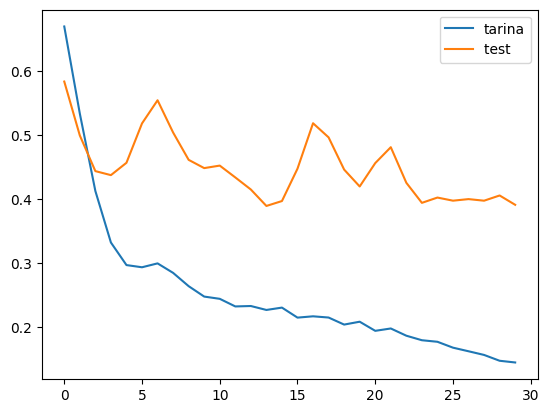

In [17]:
plt.plot(history_Adam.history['loss'], label = "tarina")
plt.plot(history_Adam.history['val_loss'], label = "test ")


plt.legend()
plt.show()

9600/9600 [==============================] - 13s 1ms/step


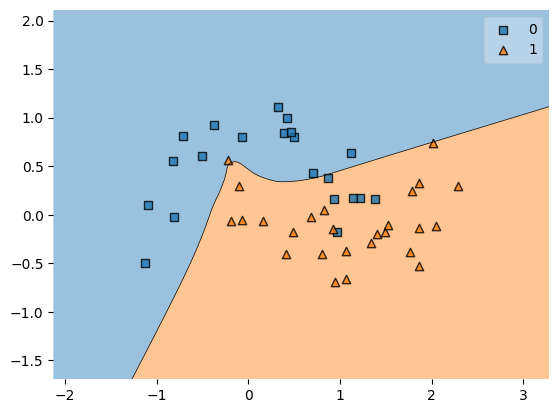

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, model)
plt.show()

/home/sit3kk/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6776 - loss: 1.0009 - val_accuracy: 0.8220 - val_loss: 0.5231
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8241 - loss: 0.5030 - val_accuracy: 0.8426 - val_loss: 0.4584
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8423 - loss: 0.4500 - val_accuracy: 0.8510 - val_loss: 0.4257
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8523 - loss: 0.4197 - val_accuracy: 0.8586 - val_loss: 0.4036
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8605 - loss: 0.3982 - val_accuracy: 0.8652 - val_loss: 0.3887
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8649 - loss: 0.3812 - val_accuracy: 0.8702 - val_loss: 0.3768
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8693 - loss: 0.3672 - val_accuracy: 0.8728 - val_loss: 0.3659
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8737 - loss: 0.3550 - 

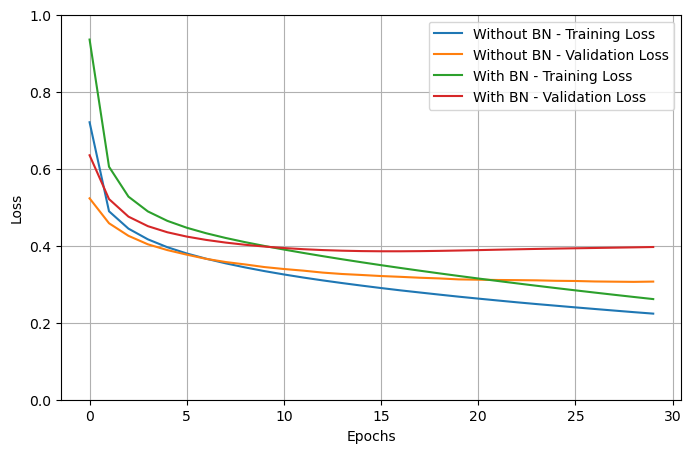

Model without BN evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8781 - loss: 0.3464
Model with BN evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8530 - loss: 0.4316
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predictions: ['Ankle boot' 'Pullover' 'Trouser']


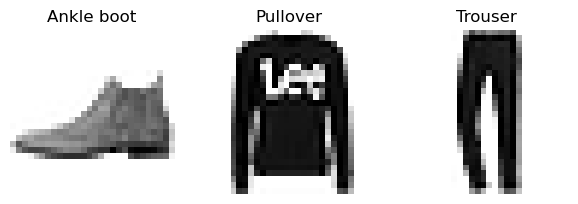

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0


class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]


keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


model_bn = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, use_bias=False),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("sigmoid"),
        keras.layers.Dense(100, use_bias=False),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("sigmoid"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

model_bn.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

history_bn = model_bn.fit(
    X_train, y_train, epochs=30, validation_data=(X_valid, y_valid)
)


plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Without BN - Training Loss")
plt.plot(history.history["val_loss"], label="Without BN - Validation Loss")
plt.plot(history_bn.history["loss"], label="With BN - Training Loss")
plt.plot(history_bn.history["val_loss"], label="With BN - Validation Loss")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


print("Model without BN evaluation:")
model.evaluate(X_test, y_test)

print("Model with BN evaluation:")
model_bn.evaluate(X_test, y_test)


X_new = X_test[:3]
y_proba = model_bn.predict(X_new)
y_proba.round(2)

y_pred = np.argmax(model_bn.predict(X_new), axis=-1)
print("Predictions:", np.array(class_names)[y_pred])


plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()